## TP3

Para la imagen suministrada eyes ””(por
ninguna razón en especial, con
heterocromía), implementar un
algoritmo que
1. Encuentre la posición de los iris en cada
par de ojos y mida su distancia en
píxeles
2. Encuentre la posición de las pupilas en
cada par de ojos y mida su distancia en
píxeles

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

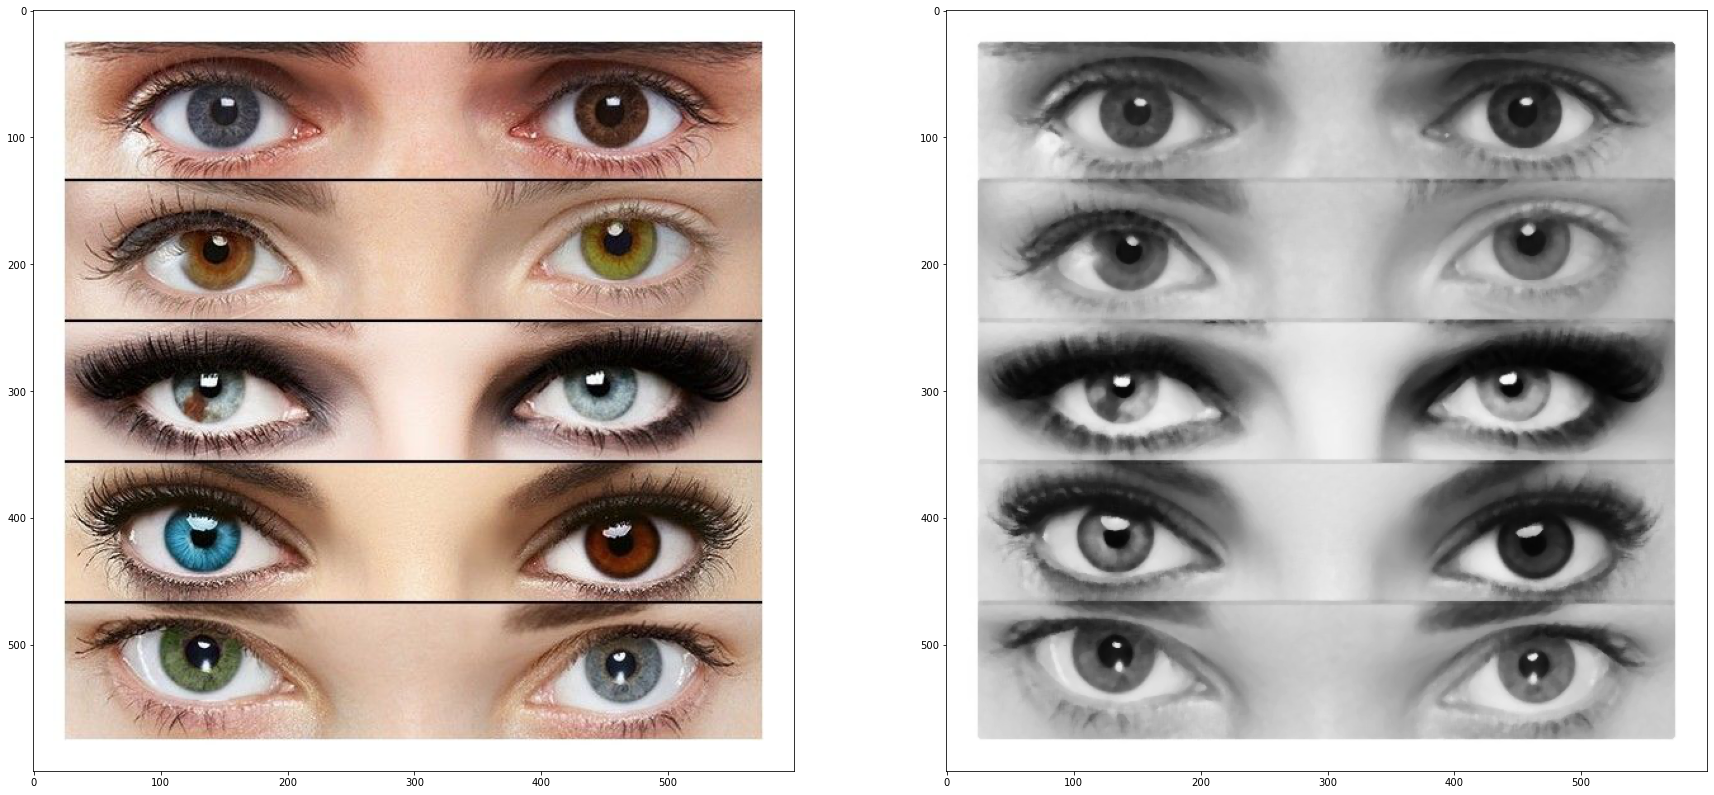

In [3]:
img = cv.imread('eyes.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)

fig, axs = plt.subplots(1, 2,figsize=(30,14))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.imshow(gray, cmap = 'gray', vmin=0, vmax=255)

plt.show()



eye1: [150  80], eye2: [456  80], Distance: 306 pixeles 
eye1: [144 188], eye2: [460 182], Distance: 316 pixeles 
eye1: [138 296], eye2: [448 294], Distance: 310 pixeles 
eye1: [464 418], eye2: [132 414], Distance: 332 pixeles 
eye1: [464 514], eye2: [132 504], Distance: 332 pixeles 


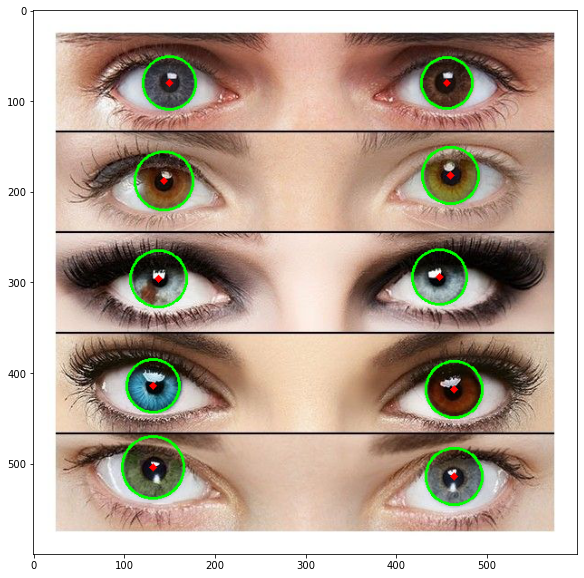

In [60]:
# Transformada de Hough

# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out = img.copy()

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT, 1,minDist=50 ,param1=250,param2=20,minRadius=20,maxRadius=50)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)


#Distancia entre centros
order = np.argsort(circles[0, :, 1])
s_circles = circles[0, order]

for i in range(int(order.size/2)):
    eye1 = s_circles[i*2].astype(np.int32)
    eye2 = s_circles[i*2+1].astype(np.int32)
    dist = abs(eye2[0] - eye1[0])
    print("eye1: {}, eye2: {}, Distance: {} pixeles ".format(eye2[:2], eye1[:2], dist))
          
fig = plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
plt.show()



eye1: [150  80], eye2: [454  80], Distance: 304 pixeles 
eye1: [144 188], eye2: [460 180], Distance: 316 pixeles 
eye1: [446 294], eye2: [138 294], Distance: 308 pixeles 
eye1: [462 420], eye2: [136 414], Distance: 326 pixeles 
eye1: [464 516], eye2: [132 506], Distance: 332 pixeles 


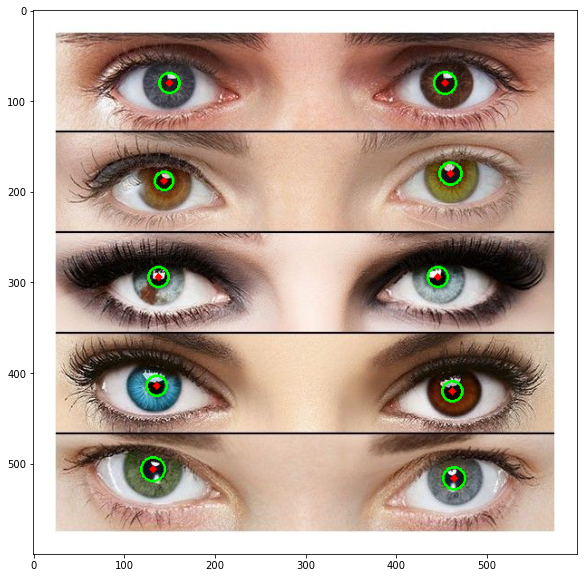

In [62]:

img_out2 = img.copy()
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=30,param1=78, param2=16, minRadius=10,maxRadius=15)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out2,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out2,(i[0],i[1]),2,(0,0,255),3)


#Distancia entre centros
order = np.argsort(circles[0, :, 1])
s_circles = circles[0, order]

for i in range(int(order.size/2)):
    eye1 = s_circles[i*2].astype(np.int32)
    eye2 = s_circles[i*2+1].astype(np.int32)
    dist = abs(eye2[0] - eye1[0])
    print("eye1: {}, eye2: {}, Distance: {} pixeles ".format(eye2[:2], eye1[:2], dist))

fig = plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img_out2, cv.COLOR_BGR2RGB))
plt.show()